# POS tagging

Part-of-Speech(POS) Tagging is the process of assigning different labels known as POS tags to the words in a sentence that tells us about the part-of-speech of the word.


Now you know what POS tags are and what is POS tagging. So let’s write the code in python for POS tagging sentences. For this purpose, I have used Spacy here, but there are other libraries like NLTK and Stanza, which can also be used for doing the same.

In [7]:
import spacy
nlp=spacy.load('en_core_web_sm')
text='It took me more than two hours to translate a few pages of English.'
for token in nlp(text):
  

  print(token.text, '=>',token.pos_,'=>',token.tag_)

It => PRON => PRP
took => VERB => VBD
me => PRON => PRP
more => ADJ => JJR
than => SCONJ => IN
two => NUM => CD
hours => NOUN => NNS
to => PART => TO
translate => VERB => VB
a => DET => DT
few => ADJ => JJ
pages => NOUN => NNS
of => ADP => IN
English => PROPN => NNP
. => PUNCT => .


In the above code sample, I have loaded the spacy’s en_web_core_sm model and used it to get the POS tags. You can see that the pos_ returns the universal POS tags, and tag_ returns detailed POS tags for words in the sentence.

# Dependency Parsing

Dependency parsing is the process of analyzing the grammatical structure of a sentence based on the dependencies between the words in a sentence.

In Dependency parsing, various tags represent the relationship between two words in a sentence. These tags are the dependency tags. For example, In the phrase ‘rainy weather,’ the word rainy modifies the meaning of the noun weather. Therefore, a dependency exists from the weather -> rainy in which the weather acts as the head and the rainy acts as dependent or child. This dependency is represented by amod tag, which stands for the adjectival modifier.

dependency tag

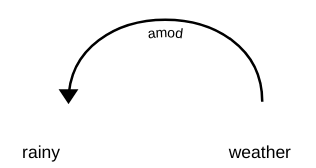

Now let’s use Spacy and find the dependencies in a sentence.

# Method 1: Using Spacy

In [8]:
import spacy
nlp=spacy.load('en_core_web_sm')

text='It took me more than two hours to translate a few pages of English.'

for token in nlp(text):
 print(token.text,'=>',token.dep_,'=>',token.head.text)

It => nsubj => took
took => ROOT => took
me => dative => took
more => amod => two
than => quantmod => two
two => nummod => hours
hours => dobj => took
to => aux => translate
translate => xcomp => took
a => det => pages
few => amod => pages
pages => dobj => translate
of => prep => pages
English => pobj => of
. => punct => took


In the above code example, the dep_ returns the dependency tag for a word, and head.text returns the respective head word. If you noticed, in the above image, the word took has a dependency tag of ROOT. This tag is assigned to the word which acts as the head of many words in a sentence but is not a child of any other word. Generally, it is the main verb of the sentence similar to ‘took’ in this case.

Now you know what dependency tags and what head, child, and root word are. But doesn’t the parsing means generating a parse tree?

Yes, we’re generating the tree here, but we’re not visualizing it. The tree generated by dependency parsing is known as a dependency tree. There are multiple ways of visualizing it, but for the sake of simplicity, we’ll use displaCy which is used for visualizing the dependency parse.

In [9]:
from spacy import displacy
displacy.render(nlp(text),jupyter=True)

In [22]:
import spacy
from spacy import displacy

# Load the language model
nlp = spacy.load("en_core_web_sm")

sentence = 'Deemed universities charge huge fees'

# nlp function returns an object with individual token information, 
# linguistic features and relationships
doc = nlp(sentence)

print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print ("-" * 70)

for token in doc:
  # Print the token, dependency nature, head and all dependents of the token
  print ("{:<15} | {:<8} | {:<15} | {:<20}"
         .format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))
  
# Use displayCy to visualize the dependency 
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

Token           | Relation | Head            | Children            
----------------------------------------------------------------------
Deemed          | amod     | universities    | []                  
universities    | nsubj    | charge          | [Deemed]            
charge          | ROOT     | charge          | [universities, fees]
huge            | amod     | fees            | []                  
fees            | dobj     | charge          | [huge]              


In the above image, the arrows represent the dependency between two words in which the word at the arrowhead is the child, and the word at the end of the arrow is head. The root word can act as the head of multiple words in a sentence but is not a child of any other word. You can see above that the word ‘took’ has multiple outgoing arrows but none incoming. Therefore, it is the root word. One interesting thing about the root word is that if you start tracing the dependencies in a sentence you can reach the root word, no matter from which word you start.

# Method 2: Using NLTK with Stanford CoreNLP

CoreNLP, created by Stanford NLP Group, provides NLP tools in Java. This Java library can be used with NLTK to parse dependencies in Python.

In [23]:
from nltk.parse.stanford import StanfordDependencyParser

Running these three commands will download the required libraries and unzip the zip file.

In [35]:
! wget https://nlp.stanford.edu/software/stanford-corenlp-4.2.2.zip
! wget https://nlp.stanford.edu/software/stanford-corenlp-4.2.2-models-english.jar


--2021-09-14 06:30:46--  https://nlp.stanford.edu/software/stanford-corenlp-4.2.2.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.2.zip [following]
--2021-09-14 06:30:47--  https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.2.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 504278711 (481M) [application/zip]
Saving to: ‘stanford-corenlp-4.2.2.zip.2’

stanford-corenlp-4. 100%[===================>] 480.92M  5.05MB/s    in 93s     

2021-09-14 06:32:20 (5.19 MB/s) - ‘stanford-corenlp-4.2.2.zip.2’ saved [504278711/504278711]

--2021-09-14 06:32:20--  https://nl

In [38]:
! unzip /content/stanford-corenlp-4.2.2.zip


Archive:  /content/stanford-corenlp-4.2.2.zip
   creating: stanford-corenlp-4.2.2/
   creating: stanford-corenlp-4.2.2/patterns/
  inflating: stanford-corenlp-4.2.2/patterns/names.txt  
 extracting: stanford-corenlp-4.2.2/patterns/otherpeople.txt  
  inflating: stanford-corenlp-4.2.2/patterns/example.properties  
  inflating: stanford-corenlp-4.2.2/patterns/presidents.txt  
  inflating: stanford-corenlp-4.2.2/patterns/goldnames.txt  
 extracting: stanford-corenlp-4.2.2/patterns/places.txt  
  inflating: stanford-corenlp-4.2.2/patterns/stopwords.txt  
 extracting: stanford-corenlp-4.2.2/patterns/goldplaces.txt  
  inflating: stanford-corenlp-4.2.2/stanford-corenlp-4.2.2-sources.jar  
  inflating: stanford-corenlp-4.2.2/pom-java-11.xml  
  inflating: stanford-corenlp-4.2.2/input.txt.out  
  inflating: stanford-corenlp-4.2.2/LIBRARY-LICENSES  
  inflating: stanford-corenlp-4.2.2/istack-commons-runtime-3.0.7.jar  
  inflating: stanford-corenlp-4.2.2/build.xml  
  inflating: stanford-corenl

In [40]:
from nltk.parse.stanford import StanfordDependencyParser

# Path to CoreNLP jar unzipped
jar_path = '/content/stanford-corenlp-4.2.2/stanford-corenlp-4.2.2.jar'

# Path to CoreNLP model jar
models_jar_path = '/content/stanford-corenlp-4.2.2-models-english.jar'

sentence = 'Deemed universities charge huge fees'

# Initialize StanfordDependency Parser from the path
parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)

# Parse the sentence
result = parser.raw_parse(sentence)
dependency = result.__next__()


print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format('Head', 'Head POS','Relation','Dependent', 'Dependent POS'))
print ("-" * 75)
  
# Use dependency.triples() to extract the dependency triples in the form
# ((head word, head POS), relation, (dependent word, dependent POS))  
for dep in list(dependency.triples()):
  print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}"
         .format(str(dep[0][0]),str(dep[0][1]), str(dep[1]), str(dep[2][0]),str(dep[2][1])))

Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
charge          | VBP        | nsubj      | universities    | NNS       
universities    | NNS        | compound   | Deemed          | NNP       
charge          | VBP        | obj        | fees            | NNS       
fees            | NNS        | amod       | huge            | JJ        


To visualize the dependency generated by CoreNLP, we can either extract a labeled and directed NetworkX Graph object using dependency.nx_graph() function or we can generate a DOT definition in Graph Description Language using dependency.to_dot() function. The DOT definition can be visualized as a graph using GraphViz.

# Visualize using NetworkX

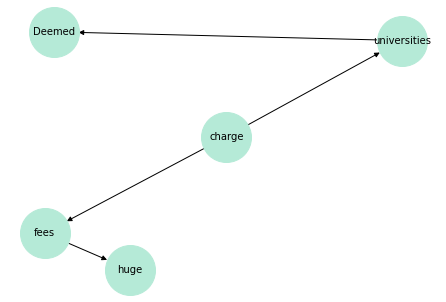

In [52]:
# importing networkx
import networkx as nx
import matplotlib.pyplot as plt
# Using reverse() to reverse the direction of edges as nx_graph() returns inverted edges
G = dependency.nx_graph().reverse()
# nx_graph() returns numeric node labels starting from 1
# Create a dictionary to map numeric nodes and words in the sentence
words = sentence.split(" ")
labels = {index + 1: words[index] for index in range(len(words))}
nx.draw(G, with_labels=True, labels=labels, node_size=2500, node_color='#B5EAD7', font_size=10)





Dependency Graph created from NetworkX Object

# Visualize using DOT Definition

In [54]:
! pip install graphviz

In [55]:

from graphviz import Source
dot_def = dependency.to_dot()
'''
The below lines require graphviz executables to be installed to your system. If that does not work, print the dot_def object and paste the output on http://graphs.grevian.org/graph/
'''
source = Source(dot_def, filename="dependency_graph", format="png")
source.view()

'dependency_graph.png'

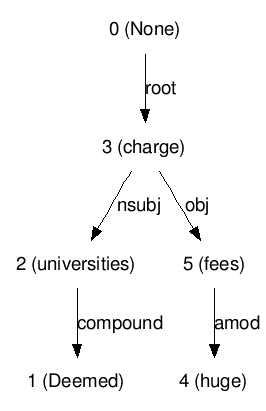

# Method 3: Using Stanza
Stanford NLP Group have also developed Stanza. It provides a Neural Network NLP Pipeline that can be customized and a Python wrapper over Stanford CoreNLP package, making it easier to use the CoreNLP features without downloading the jar files.

In [57]:
! pip install stanza

     |████████████████████████████████| 342 kB 32.7 MB/s 


In [58]:
import stanza
stanza.download('en')

2021-09-14 07:04:13 INFO: Downloading default packages for language: en (English)...


2021-09-14 07:05:35 INFO: Finished downloading models and saved to /root/stanza_resources.


Initialize the neural pipeline using stanza.Pipeline() function. The first parameter is the language to use. An optional parameter processors can be passed which can be a dictionary or a comma separated string to configure the processors to use in the pipeline.

In [59]:
nlp = stanza.Pipeline('en',
                     processors = 'tokenize,mwt,pos,lemma,depparse')

2021-09-14 07:06:04 WARNING: Can not find mwt: default from official model list. Ignoring it.
2021-09-14 07:06:04 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2021-09-14 07:06:04 INFO: Use device: cpu
2021-09-14 07:06:04 INFO: Loading: tokenize
2021-09-14 07:06:04 INFO: Loading: pos
2021-09-14 07:06:04 INFO: Loading: lemma
2021-09-14 07:06:04 INFO: Loading: depparse
2021-09-14 07:06:05 INFO: Done loading processors!


You can find the list of all processors on Pipeline and Processors. Some of the processors might require to be preceded by some other processor in the pipeline, else they won’t work. For example, pos processor requires tokenizeand mwt processors, so we need to use these two processors in the pipeline as well if we want to use pos processor.
We will now pass our sentence through the pipeline and store all the results in doc variable.

In [60]:
doc = nlp(sentence)

In [61]:
doc.sentences

[[
   {
     "id": 1,
     "text": "Deemed",
     "lemma": "Deem",
     "upos": "VERB",
     "xpos": "VBN",
     "feats": "Tense=Past|VerbForm=Part",
     "head": 2,
     "deprel": "amod",
     "start_char": 0,
     "end_char": 6
   },
   {
     "id": 2,
     "text": "universities",
     "lemma": "university",
     "upos": "NOUN",
     "xpos": "NNS",
     "feats": "Number=Plur",
     "head": 3,
     "deprel": "nsubj",
     "start_char": 7,
     "end_char": 19
   },
   {
     "id": 3,
     "text": "charge",
     "lemma": "charge",
     "upos": "VERB",
     "xpos": "VBP",
     "feats": "Mood=Ind|Tense=Pres|VerbForm=Fin",
     "head": 0,
     "deprel": "root",
     "start_char": 20,
     "end_char": 26
   },
   {
     "id": 4,
     "text": "huge",
     "lemma": "huge",
     "upos": "ADJ",
     "xpos": "JJ",
     "feats": "Degree=Pos",
     "head": 5,
     "deprel": "amod",
     "start_char": 27,
     "end_char": 31
   },
   {
     "id": 5,
     "text": "fees",
     "lemma": "fee",
     "u

If we print doc.sentences , we will see a list for each of the sentence that was passed through the pipeline. Each list contains result of all token information and linguistic features.

Note: In our case as we have only one sentence, we directly access it using doc.sentences[0]

In [62]:
import stanza

# Download the language model
stanza.download('en')

sentence = 'Deemed universities charge huge fees'

# Build a Neural Pipeline
nlp = stanza.Pipeline('en', processors = "tokenize,mwt,pos,lemma,depparse") 

# Pass the sentence through the pipeline
doc = nlp(sentence)

# Print the dependencies of the first sentence in the doc object
# Format - (Token, Index of head, Nature of dependency)
# Index starts from 1, 0 is reserved for ROOT
doc.sentences[0].print_dependencies()


print ("{:<15} | {:<10} | {:<15} ".format('Token', 'Relation', 'Head'))
print ("-" * 50)
  
# Convert sentence object to dictionary  
sent_dict = doc.sentences[0].to_dict()

# iterate to print the token, relation and head
for word in sent_dict:
  print ("{:<15} | {:<10} | {:<15} "
         .format(str(word['text']),str(word['deprel']), str(sent_dict[word['head']-1]['text'] if word['head'] > 0 else 'ROOT')))


2021-09-14 07:09:56 INFO: Downloading default packages for language: en (English)...
2021-09-14 07:09:57 INFO: File exists: /root/stanza_resources/en/default.zip.
2021-09-14 07:10:03 INFO: Finished downloading models and saved to /root/stanza_resources.
2021-09-14 07:10:03 WARNING: Can not find mwt: default from official model list. Ignoring it.
2021-09-14 07:10:03 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2021-09-14 07:10:03 INFO: Use device: cpu
2021-09-14 07:10:03 INFO: Loading: tokenize
2021-09-14 07:10:03 INFO: Loading: pos
2021-09-14 07:10:03 INFO: Loading: lemma
2021-09-14 07:10:03 INFO: Loading: depparse
2021-09-14 07:10:03 INFO: Done loading processors!


('Deemed', 2, 'amod')
('universities', 3, 'nsubj')
('charge', 0, 'root')
('huge', 5, 'amod')
('fees', 3, 'obj')
Token           | Relation   | Head            
--------------------------------------------------
Deemed          | amod       | universities    
universities    | nsubj      | charge          
charge          | root       | ROOT            
huge            | amod       | fees            
fees            | obj        | charge          


# Constituency Parsing
Constituency Parsing is the process of analyzing the sentences by breaking down it into sub-phrases also known as constituents. These sub-phrases belong to a specific category of grammar like NP (noun phrase) and VP(verb phrase).

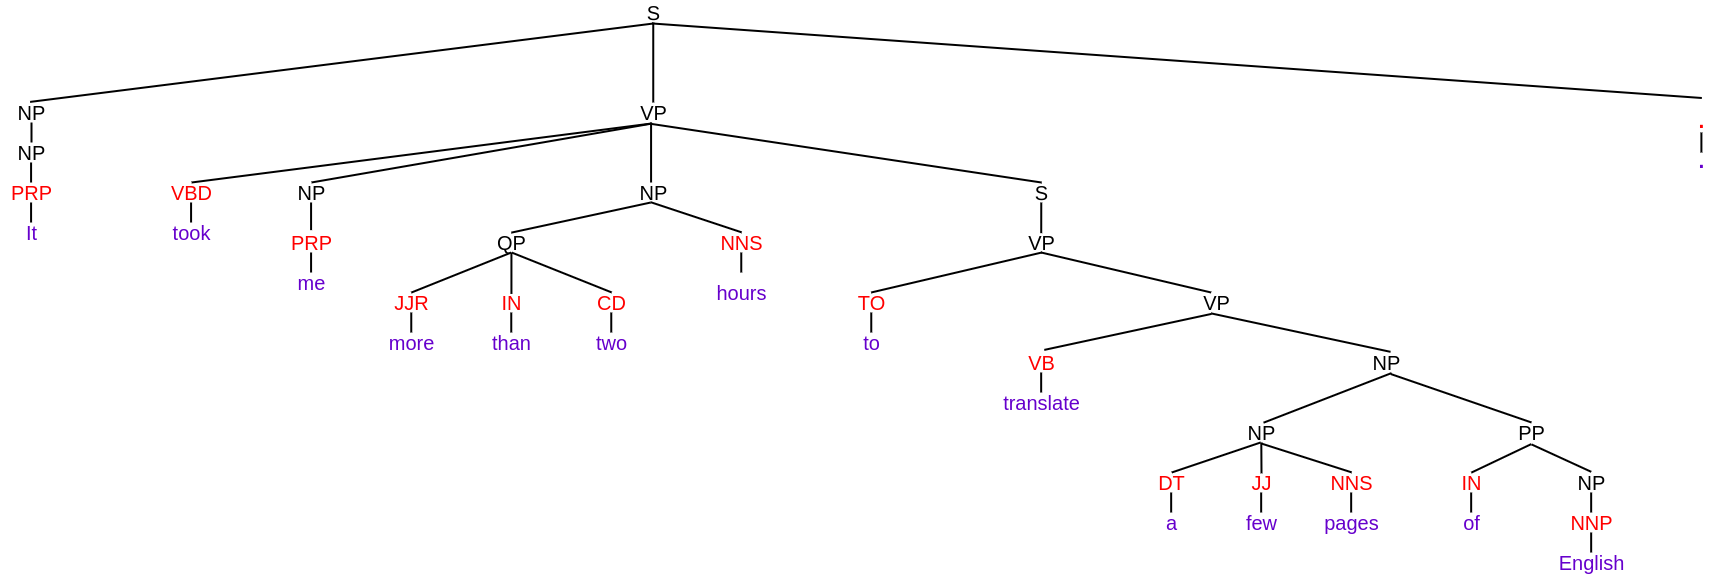

 

Let’s understand it with the help of an example. Suppose I have the same sentence which I used in previous examples, i.e., “It took me more than two hours to translate a few pages of English.” and I have performed constituency parsing on it. Then, the constituency parse tree for this sentence is given by-